In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/hp/Desktop/python/modcloth.csv')

In [3]:
df.head(10)

,item_id,user_id,rating,timestamp,user_attr,model_attr,category,brand,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,Small,Small,Dresses,local,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,Small,Dresses,local,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,Small,Small,Dresses,local,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,Small,Dresses,local,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,Small,Small,Dresses,local,0
5,7443,gina.chihos,5,2010-02-25 08:00:00+00:00,NaN,Small,Dresses,local,0
6,7443,Kim,2,2010-02-26 08:00:00+00:00,Small,Small,Dresses,local,0
7,7443,jess.betcher,5,2010-03-26 07:00:00+00:00,NaN,Small,Dresses,local,0
8,7443,Elissa,4,2010-04-06 07:00:00+00:00,Small,Small,Dresses,local,0
9,7443,Yvette,4,2010-04-08 07:00:00+00:00,Large,Small,Dresses,local,0


In [4]:
df.drop(columns=['split'],inplace=True)

In [5]:
df['user_attr']=df['user_attr'].replace(" ",np.NaN)

In [6]:
ratings=pd.DataFrame(df.groupby(['category','model_attr','brand'])['rating'].mean().sort_values(ascending=False))
ratings.head(100)


rating
category  model_attr brand                        
Outerwear Small      Collectif            5.000000
Bottoms   Small      BB Dakota            5.000000
Dresses   Small      Emily and Fin        4.833333
Tops      Small      Daisey Natives       4.741379
                     Kin Ship             4.671088
...                                            ...
Dresses   Small      Sugarhill Boutique   3.821429
Bottoms   Small      Collectif            3.810127
Outerwear Small      Jack by BB Dakota    3.444444
Dresses   Small      Compania Fantastica  3.285714
Tops      Small      Retrolicious         2.500000

[71 rows x 1 columns]

In [7]:
df.groupby(['category','model_attr','brand'])['rating'].count().sort_values(ascending=False)

category   model_attr   brand       
Tops       Small&Large  local           18100
Dresses    Small&Large  local           14855
Tops       Small        local            9923
Dresses    Small        local            9571
Bottoms    Small&Large  local            9371
                                        ...  
           Small        Pepaloves           6
Tops       Small        Retrolicious        4
Bottoms    Small        Rolla's             4
Outerwear  Small        Miss Patina         2
Bottoms    Small        BB Dakota           1
Name: rating, Length: 71, dtype: int64

In [8]:
ratings['num of rating']=pd.DataFrame(df.groupby(['category','model_attr','brand'])['rating'].count().sort_values(ascending=False))

In [9]:
ratings.head()

rating  num of rating
category  model_attr brand                                  
Outerwear Small      Collectif       5.000000              7
Bottoms   Small      BB Dakota       5.000000              1
Dresses   Small      Emily and Fin   4.833333             12
Tops      Small      Daisey Natives  4.741379             58
                     Kin Ship        4.671088            377

<AxesSubplot:>

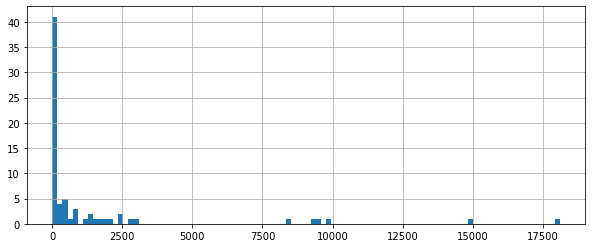

In [10]:
plt.figure(figsize=(10,4))
ratings['num of rating'].hist(bins=100)

<AxesSubplot:>

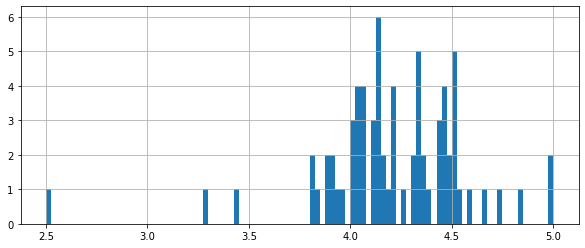

In [11]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=100)

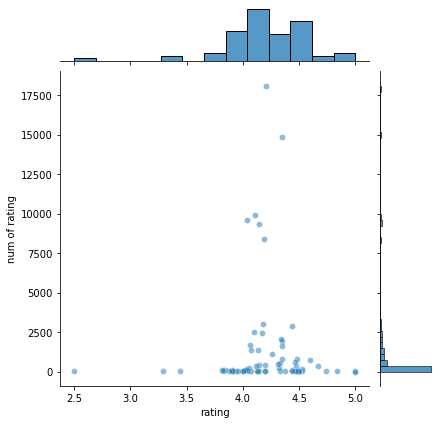

In [12]:
sns.jointplot(x='rating',y='num of rating',data=ratings,alpha=0.5)

In [13]:
productmatch=df.pivot_table(index='user_id',columns=['category','model_attr','brand'],values='rating')
productmatch.head(100)
                                                    
                                                     

category        Bottoms                                                 \
model_attr        Small                                                  
brand       Alice's Pig BB Dakota Banned Collectif Compania Fantastica   
user_id                                                                  
"Ferrari")          NaN       NaN    NaN       NaN                 NaN   
#                   NaN       NaN    NaN       NaN                 NaN   
#1dad               NaN       NaN    NaN       NaN                 NaN   
#NAME?              NaN       NaN    NaN       NaN                 NaN   
'Chelle             NaN       NaN    NaN       NaN                 NaN   
...                 ...       ...    ...       ...                 ...   
76gonzalo           NaN       NaN    NaN       NaN                 NaN   
7girlpower7         NaN       NaN    NaN       NaN                 NaN   
7maryellen          NaN       NaN    NaN       NaN                 NaN   
7mintjj             NaN       NaN    NaN       NaN                 NaN   
80256016            NaN       NaN    NaN       NaN                 NaN   

category                                                       ...     Tops  \
model_attr                                                     ...    Small   
brand       Hell Bunny Louche ModCloth Pepaloves Pink Martini  ... Kin Ship   
user_id                                                        ...            
"Ferrari")         NaN    NaN      NaN       NaN          NaN  ...      NaN   
#                  NaN    NaN      NaN       NaN          NaN  ...      NaN   
#1dad              NaN    NaN      NaN       NaN          NaN  ...      NaN   
#NAME?             NaN    NaN      NaN       NaN          NaN  ...      NaN   
'Chelle            NaN    NaN      NaN       NaN          NaN  ...      NaN   
...                ...    ...      ...       ...          ...  ...      ...   
76gonzalo          NaN    NaN      NaN       NaN          NaN  ...      NaN   
7girlpower7        NaN    NaN      NaN       NaN          NaN  ...      NaN   
7maryellen         NaN    NaN      NaN       NaN          NaN  ...      NaN   
7mintjj            NaN    NaN      NaN       NaN          NaN  ...      NaN   
80256016           NaN    NaN      NaN       NaN          NaN  ...      NaN   

category                                                                    \
model_attr                                                                   
brand       ModCloth Out of Print Retrolicious Sugarhill Boutique Wrangler   
user_id                                                                      
"Ferrari")       NaN          NaN          NaN                NaN      NaN   
#                NaN          NaN          NaN                NaN      NaN   
#1dad            NaN          NaN          NaN                NaN      NaN   
#NAME?           5.0          NaN          NaN                NaN      NaN   
'Chelle          3.0          NaN          NaN                NaN      NaN   
...              ...          ...          ...                ...      ...   
76gonzalo        NaN          NaN          NaN                NaN      NaN   
7girlpower7      NaN          NaN          NaN                NaN      NaN   
7maryellen       NaN          NaN          NaN                NaN      NaN   
7mintjj          NaN          NaN          NaN                NaN      NaN   
80256016         NaN          NaN          NaN                NaN      NaN   

category                                      
model_attr        Small&Large                 
brand       local      Banned ModCloth local  
user_id                                       
"Ferrari")    NaN         NaN      NaN   5.0  
#             NaN         NaN      5.0   NaN  
#1dad         NaN         NaN      NaN   NaN  
#NAME?        NaN         NaN      NaN   NaN  
'Chelle       NaN         NaN      NaN   NaN  
...           ...         ...      ...   ...  
76gonzalo     NaN         NaN      NaN   NaN  
7girlpower7   N

In [14]:
ratings.sort_values('num of rating',ascending=False).head(10)

rating  num of rating
category model_attr  brand                                  
Tops     Small&Large local           4.208950          18100
Dresses  Small&Large local           4.350185          14855
Tops     Small       local           4.107427           9923
Dresses  Small       local           4.033539           9571
Bottoms  Small&Large local           4.143421           9371
         Small       local           4.188717           8420
                     ModCloth        4.174407           2993
Tops     Small&Large ModCloth        4.433161           2895
         Small       ModCloth        4.102049           2489
Dresses  Small&Large Chi Chi London  4.170671           2414

In [15]:
best_user_rating=productmatch['Tops','Small&Large','local']
best_user_rating.head()

user_id
"Ferrari")    5.0
#             NaN
#1dad         NaN
#NAME?        NaN
'Chelle       NaN
Name: (Tops, Small&Large, local), dtype: float64

In [16]:
similar=productmatch.corrwith(best_user_rating)

C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [17]:
corr=pd.DataFrame(similar,columns=['Correlation'])
corr.dropna(inplace=True)
corr.head()

Correlation
category model_attr brand                           
Bottoms  Small      Alice's Pig            -0.281745
                    Banned                  0.292256
                    Collectif               0.063226
                    Compania Fantastica    -0.301393
                    Hell Bunny             -0.056760

In [18]:
corr.sort_values('Correlation',ascending=False).head(10)

Correlation
category  model_attr  brand                         
Tops      Small&Large local                 1.000000
Dresses   Small       Eliza J               0.783776
                      Jack by BB Dakota     0.691065
Bottoms   Small       Retrolicious          0.624197
Dresses   Small       Closet London         0.609994
Tops      Small       Retrolicious          0.574661
Dresses   Small       BB Dakota             0.544262
                      Yumi                  0.532820
Outerwear Small       Jack by BB Dakota     0.428315
                      Hell Bunny            0.307485

In [19]:
corr=corr.join(ratings['num of rating'])
corr.head()

Correlation  num of rating
category model_attr brand                                          
Bottoms  Small      Alice's Pig            -0.281745             25
                    Banned                  0.292256             41
                    Collectif               0.063226             79
                    Compania Fantastica    -0.301393             20
                    Hell Bunny             -0.056760            110

In [20]:
corr[corr['num of rating']>100].sort_values('Correlation',ascending=False).head(10)

Correlation  num of rating
category  model_attr  brand                                
Tops      Small&Large local         1.000000          18100
Outerwear Small&Large ModCloth      0.156883           1375
Tops      Small       local         0.148080           9923
          Small&Large ModCloth      0.141242           2895
Dresses   Small&Large local         0.132347          14855
Bottoms   Small&Large local         0.120824           9371
Dresses   Small       Pepaloves     0.101173            202
Bottoms   Small&Large ModCloth      0.101153           1944
Dresses   Small       Banned        0.101074            210
Bottoms   Small       local         0.099956           8420